In [5]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined_ride_data = pd.merge(city_data_df , ride_data_df , how='left' , on='city')

# Display the data table for preview
combined_ride_data.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [6]:
grouped_ride_data = combined_ride_data.groupby('city')
grouped_type_data = combined_ride_data.groupby('type')

## Bubble Plot of Ride Sharing Data

In [ ]:
average_fare = grouped_type_data['fare'].sum()
average_fare

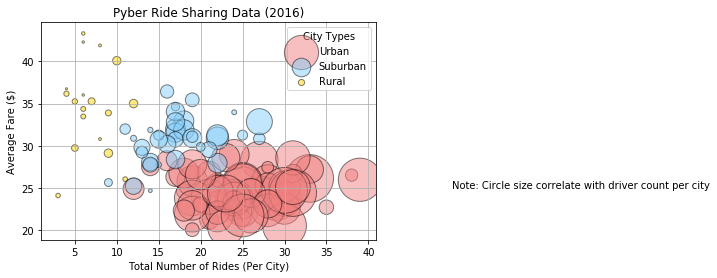

In [24]:
urb_df = combined_ride_data[combined_ride_data['type']=='Urban']
sub_df = combined_ride_data[combined_ride_data['type']=='Suburban']
rur_df = combined_ride_data[combined_ride_data['type']=='Rural']

# Obtain the x and y coordinates for each of the three city types
urb_x = urb_df.groupby('city').count()['ride_id']
urb_y = urb_df.groupby('city').mean()['fare']
urb_z = urb_df.groupby('city').sum()['driver_count']
sub_x = sub_df.groupby('city').count()['ride_id']
sub_y = sub_df.groupby('city').mean()['fare']
sub_z = sub_df.groupby('city').sum()['driver_count']
rur_x = rur_df.groupby('city').count()['ride_id']
rur_y = rur_df.groupby('city').mean()['fare']
rur_z = rur_df.groupby('city').sum()['driver_count']


# Build the scatter plots for each city types
plt.scatter(urb_x , urb_y , s = urb_z , color='lightcoral' , alpha = .5 , edgecolor = "black" , label = 'Urban')
plt.scatter(sub_x , sub_y , s = sub_z , color = 'lightskyblue' , alpha = .5 , edgecolor = "black" , label = 'Suburban')
plt.scatter(rur_x , rur_y , s = rur_z , color = 'gold' , alpha = .5 , edgecolor = "black" , label = 'Rural')
# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid()

# Create a legend
lgnd = plt.legend(loc='best' , title = 'City Types' , mode = 'Expanded')

# Incorporate a text label regarding circle size
plt.text(50,25,"Note: Circle size correlate with driver count per city")

# Save Figure
plt.savefig("../Images/ride_sharing_bubble.png")

In [ ]:
# Show plot
plt.show()

## Total Fares by City Type

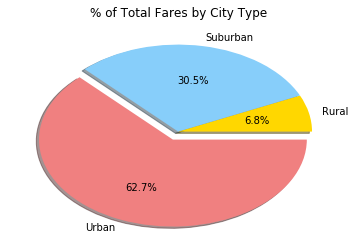

In [14]:
# Calculate Type Percents
total_fare = combined_ride_data['fare'].sum()
total_fare_per_type = grouped_type_data['fare'].sum()

total_percent = ((total_fare_per_type / total_fare ) *100)

# Build Pie Chart
labels = ["Rural" , "Suburban" , "Urban"]
colors = ["gold" , "lightskyblue" , "lightcoral"]
explode = [0,0,0.1]

plt.pie(total_percent , labels = labels , explode =explode, colors = colors , shadow = True , autopct="%1.1f%%")
plt.title('% of Total Fares by City Type')
# Save Figure
plt.savefig("../Images/fares_by_city_type.png")

In [ ]:
# Show Figure
plt.show()

## Total Rides by City Type

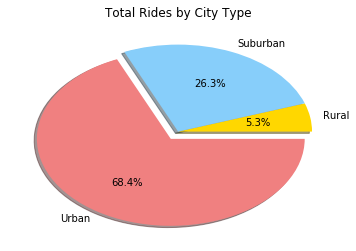

In [16]:
# Calculate Ride Percents
total_rides_by_type = grouped_type_data['ride_id'].count()
total_rides = combined_ride_data['ride_id'].count()

rides_percent = ((total_rides_by_type / total_rides) * 100)
# Build Pie Chart
labels = ["Rural" , "Suburban" , "Urban"]
colors = ["gold" , "lightskyblue" , "lightcoral"]
explode = [0,0,0.1]

plt.pie(rides_percent , labels = labels , explode =explode, colors = colors , shadow = True , autopct="%1.1f%%")
plt.title('Total Rides by City Type')
# Save Figure
plt.savefig("../Images/rides_by_city_type.png")

In [ ]:
# Show Figure
plt.show()

## Total Drivers by City Type

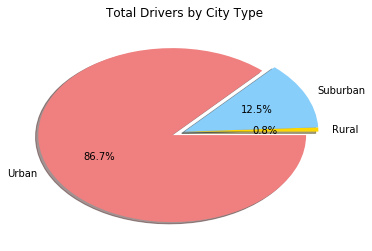

In [17]:
# Calculate Driver Percents
total_drivers_by_type = grouped_type_data['driver_count'].sum()
total_drivers = combined_ride_data['driver_count'].sum()

drivers_percent = ((total_drivers_by_type / total_drivers) * 100)
# Build Pie Charts
labels = ["Rural" , "Suburban" , "Urban"]
colors = ["gold" , "lightskyblue" , "lightcoral"]
explode = [0,0,0.1]

plt.pie(drivers_percent , labels = labels , explode =explode, colors = colors , shadow = True , autopct="%1.1f%%")
plt.title('Total Drivers by City Type')
# Save Figure
plt.savefig("../Images/drivers_by_city_type.png")

In [ ]:
# Show Figure
plt.show()